In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pickle
from calcwf import *
from interpolating_match import *

Let's first take a look at the (quad) mismatch between harmonics generated at different fiducial eccentricities with the non-eccentric waveform along the degeneracy line for different chirp masses.

In [2]:
# Find mismatches for a range of fid_e values
def find_quad_mismatches(chirp, fid_es, n, q=2, f_low=10, sample_rate=4096, approximant='TEOBResumS'):

    # Generate non-eccentric waveform
    h = gen_wf(f_low, 0, chirp2total(chirp, q), q, sample_rate, approximant)

    # Generate chirp masses along degeneracy line
    fid_chirps = chirp_degeneracy_line(chirp, fid_es, sample_rate, f_low=f_low, q=q)

    # Calculate mismatch for each fid_e
    mismatches = []
    for i, (fid_e, fid_chirp) in enumerate(zip(fid_es, fid_chirps)):
        all_wfs = list(get_h([1]*n, f_low, fid_e, chirp2total(fid_chirp, q), q, sample_rate, approximant=approximant))
        matches = match_hn(all_wfs[1:n+1], h, f_low)
        quad_match = np.sqrt(np.sum(np.abs(matches)**2))
        mismatches.append(1-quad_match)
        print(f'\r{i+1} done out of {len(fid_es)}', end='')
    print('')

    return np.array(mismatches)

In [3]:
# Calculate mismatches for 10, 30, and 70 chirp masses
mismatches_10 = find_quad_mismatches(10, np.linspace(0,0.15,16), 4)
mismatches_30 = find_quad_mismatches(30, np.linspace(0,0.30,31), 4)
mismatches_70 = find_quad_mismatches(70, np.linspace(0,0.50,51), 4)

/home/ben.patterson/.conda/envs/teobresums_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:435: RuntimeWarning: divide by zero encountered in power
  return self._data ** other
/home/ben.patterson/.conda/envs/teobresums_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:348: RuntimeWarning: invalid value encountered in multiply
  return self._data * other


16 done out of 16
31 done out of 31
51 done out of 51


(0.0, 0.007)

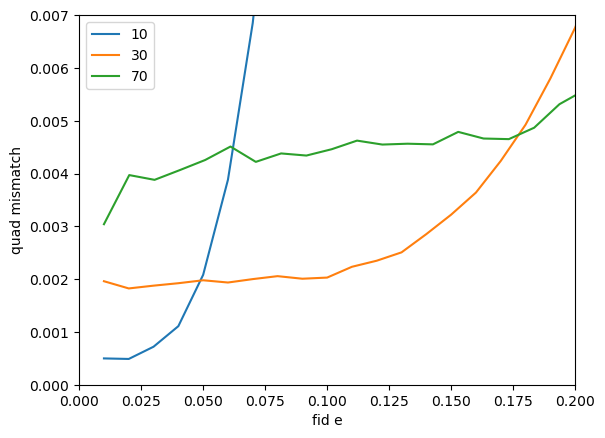

In [4]:
plt.plot(np.linspace(0.01,0.15,15), mismatches_10[1:], label='10')
plt.plot(np.linspace(0.01,0.30,30), mismatches_30[1:], label='30')
plt.plot(np.linspace(0.01,0.51,50), mismatches_70[1:], label='70')
plt.legend()
plt.xlabel('fid e')
plt.ylabel('quad mismatch')
plt.xlim(0,0.2)
plt.ylim(0,0.007)

Seems like this idea of holding the quad mismatch constant is unlikely to work based on this. What if we try mismatch with a teobresums wf instead of our harmonics?

In [5]:
# Find mismatches for a range of fid_e values
def find_mismatches(chirp, fid_es, q=2, f_low=10, sample_rate=4096, approximant='TEOBResumS'):

    # Generate non-eccentric waveform
    h = gen_wf(f_low, 0.001, chirp2total(chirp, q), q, sample_rate, approximant)

    # Generate chirp masses along degeneracy line
    fid_chirps = chirp_degeneracy_line(chirp, fid_es, sample_rate, f_low=f_low, q=q)

    # Calculate mismatch for each fid_e
    mismatches = []
    for i, (fid_e, fid_chirp) in enumerate(zip(fid_es, fid_chirps)):
        s = gen_wf(f_low, fid_e, chirp2total(fid_chirp, q), q, sample_rate, approximant)
        match = match_wfs(s, h, f_low, True)
        mismatches.append(1-match)
        print(f'\r{i+1} done out of {len(fid_es)}', end='')
    print('')

    return np.array(mismatches)

In [6]:
mismatch_10 = find_mismatches(10, np.linspace(0,0.15,16))
mismatch_30 = find_mismatches(30, np.linspace(0,0.30,31))
mismatch_70 = find_mismatches(70, np.linspace(0,0.50,51))

16 done out of 16
31 done out of 31
51 done out of 51


(0.0, 0.22903198817679543)

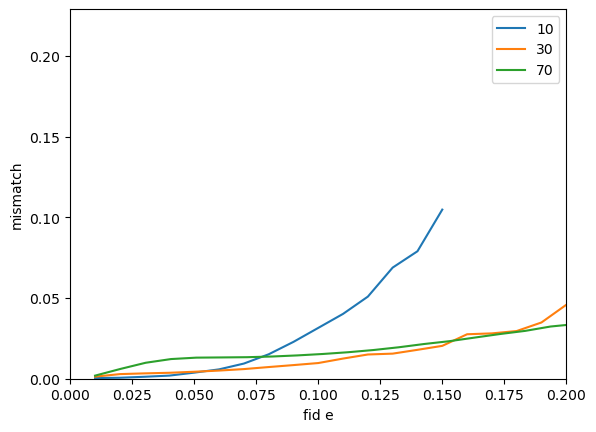

In [7]:
plt.plot(np.linspace(0.01,0.15,15), mismatch_10[1:], label='10')
plt.plot(np.linspace(0.01,0.30,30), mismatch_30[1:], label='30')
plt.plot(np.linspace(0.01,0.51,50), mismatch_70[1:], label='70')
plt.legend()
plt.xlabel('fid e')
plt.ylabel('mismatch')
plt.xlim(0,0.2)
plt.ylim(0)

Also tried giving non-eccentric teobresums wf e=0.001 here, but seems like trying to do this numerically will not work - may instead have to try it analytically by looking at equations similar to those used to derive our line of degeneracy.

First let's look at min/max lines for different fiducial eccentricities at an eccentric chirp mass of 30.

## 30 chirp mass min/max lines

In [10]:
with open(os.path.join('grid_data', 'dataslot_22', 'all_matches'), 'rb') as fp:
        grid_data_30_fid_es = pickle.load(fp)
grid_data_30_fid_es = find_min_max(grid_data_30_fid_es, extra_keys=[])

/tmp/ipykernel_2120548/3076455515.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/3076455515.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/3076455515.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
/tmp/ipykernel_2120548/3076455515.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')


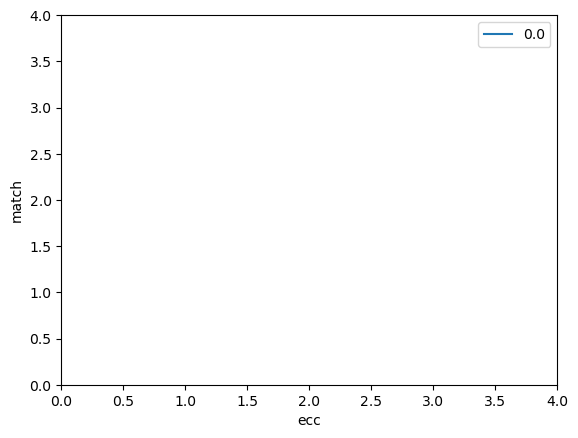

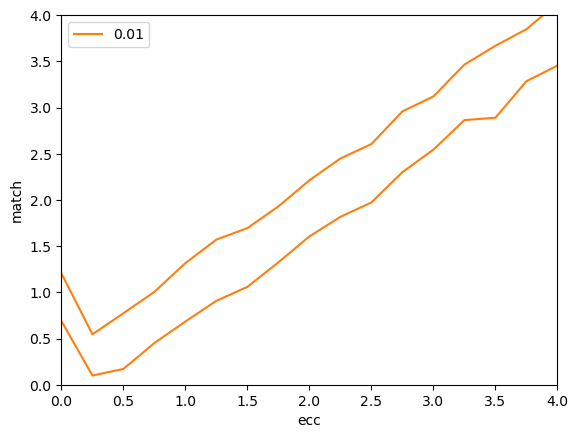

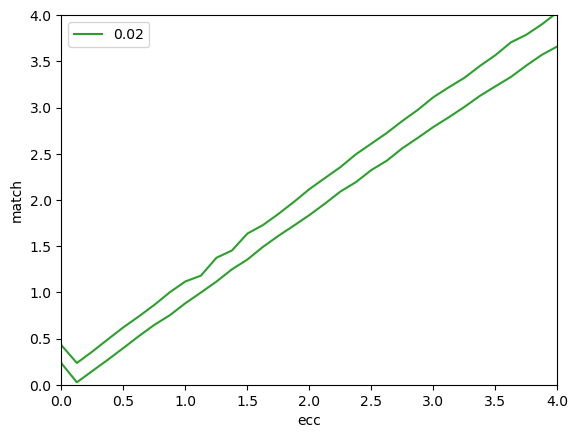

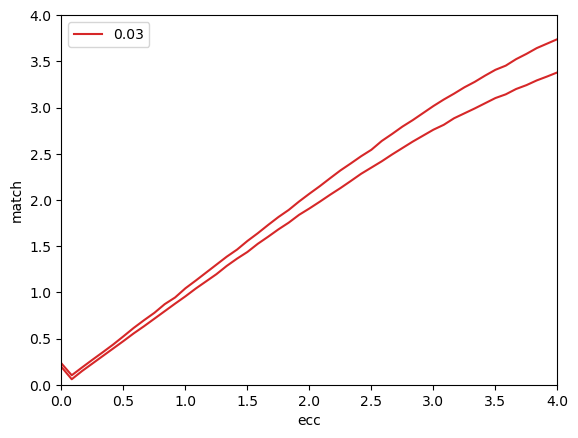

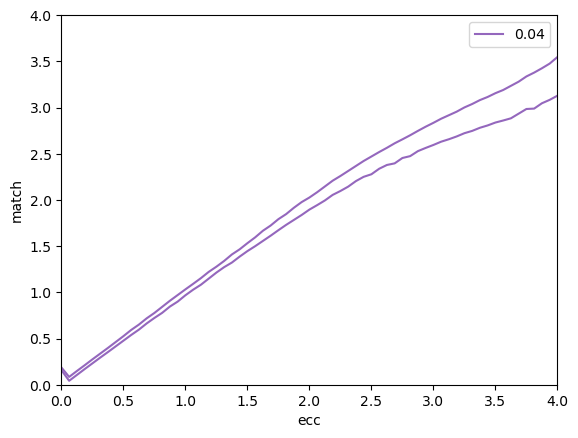

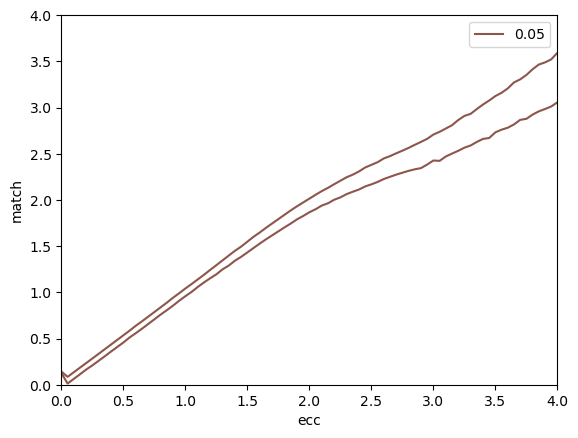

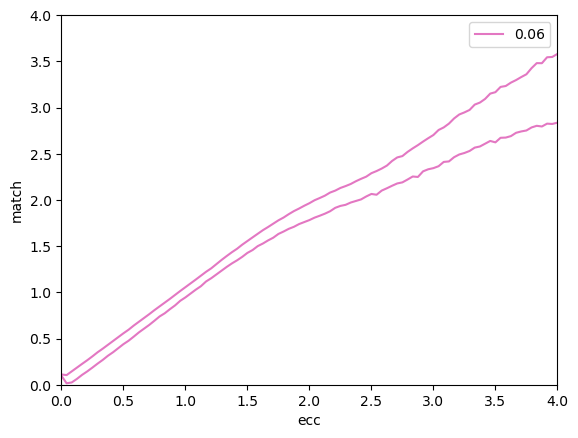

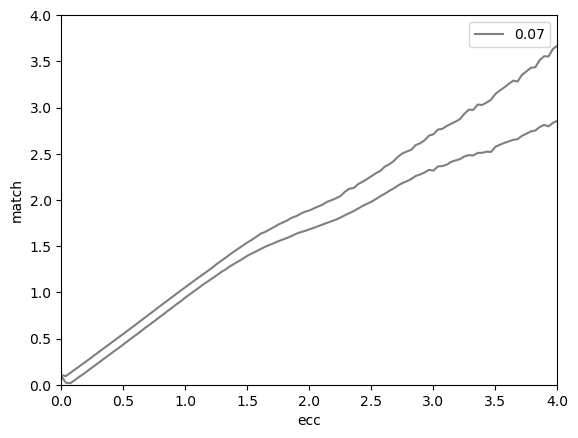

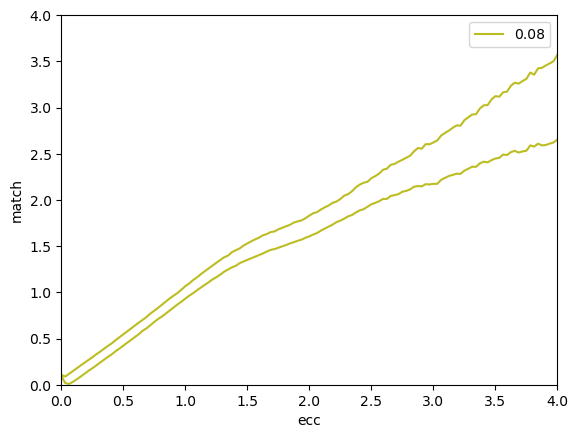

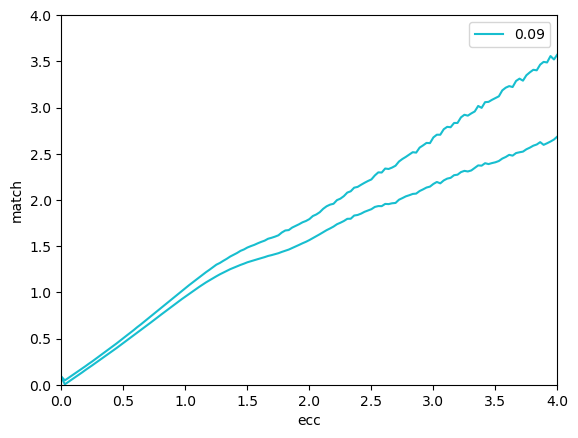

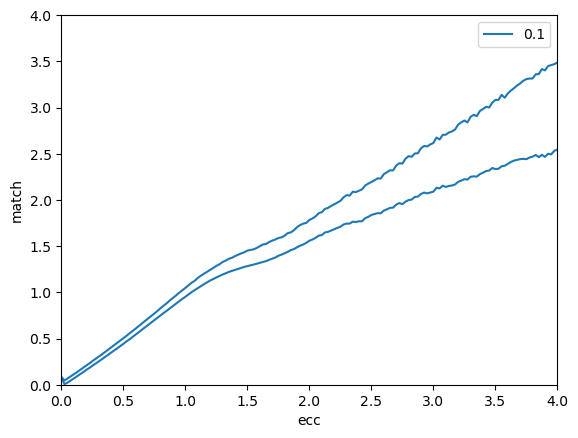

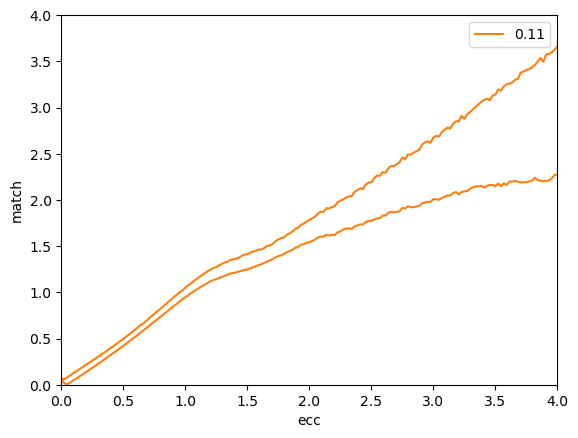

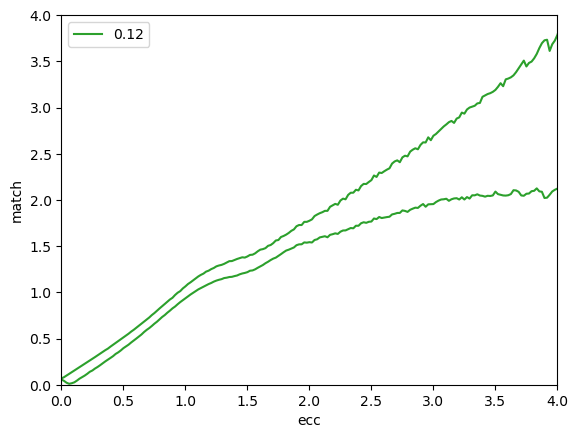

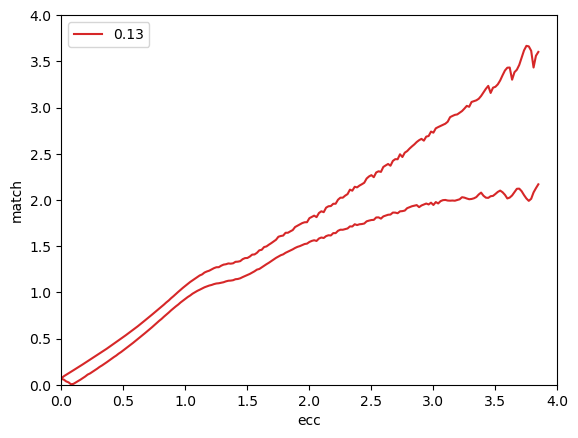

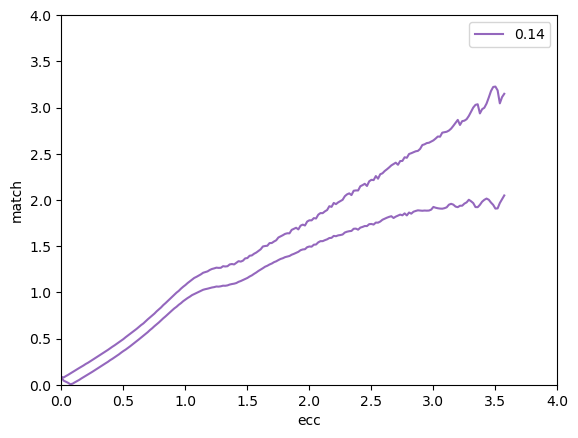

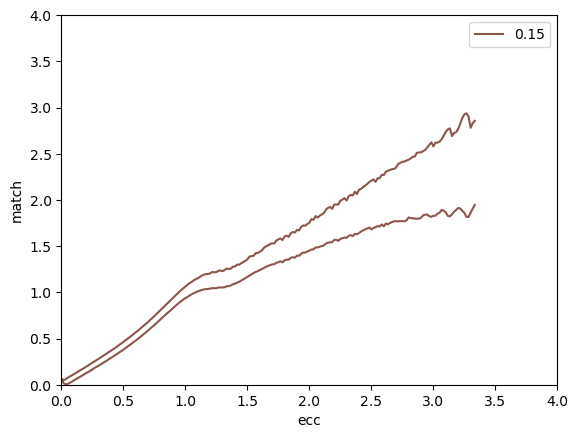

In [11]:
cmap = mpl.colormaps['inferno']
for i, fid_e in enumerate(grid_data_30_fid_es.keys()):
    fid_e_arg = int((fid_e-grid_data_30_fid_es[fid_e]['e_vals'][0])/np.mean(np.diff(grid_data_30_fid_es[fid_e]['e_vals'])))
    fid_e_match_max = grid_data_30_fid_es[fid_e]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_30_fid_es[fid_e]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
    plt.plot(grid_data_30_fid_es[fid_e]['e_vals']/fid_e, grid_data_30_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## 18 chirp mass min/max lines

In [12]:
with open(os.path.join('grid_data', 'dataslot_24', 'all_matches'), 'rb') as fp:
        grid_data_18_fid_es = pickle.load(fp)
grid_data_18_fid_es = find_min_max(grid_data_18_fid_es, extra_keys=[])

/tmp/ipykernel_2120548/1736495743.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/1736495743.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/1736495743.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
/tmp/ipykernel_2120548/1736495743.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')


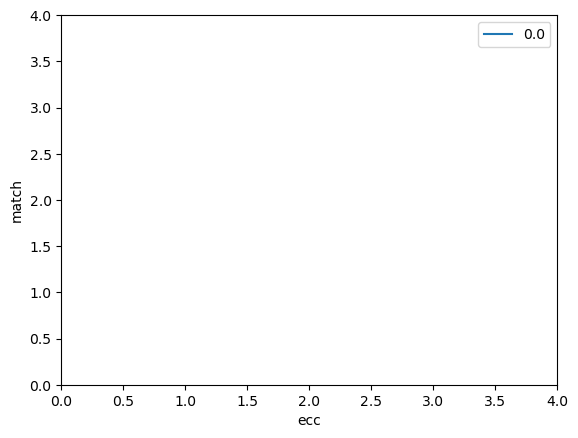

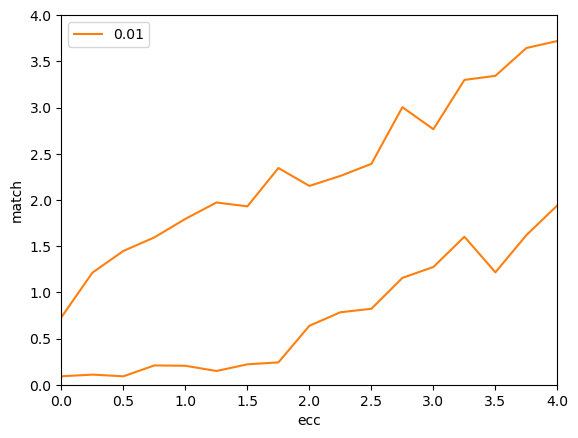

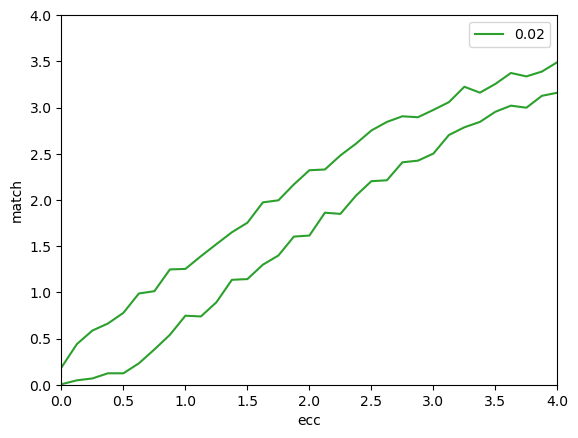

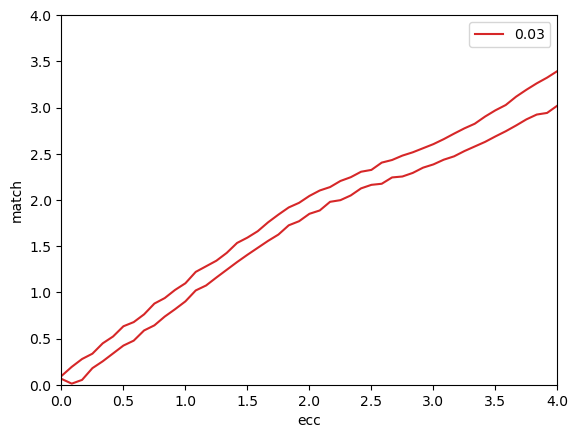

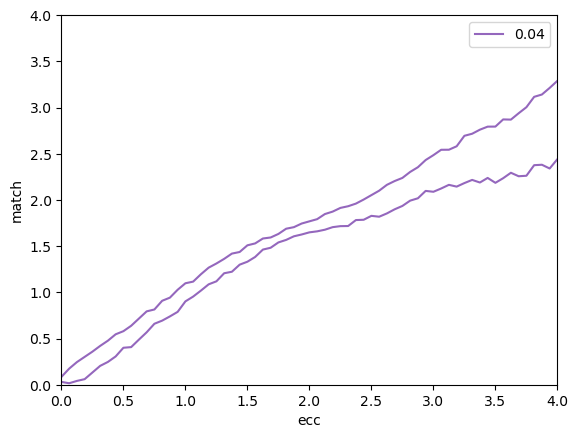

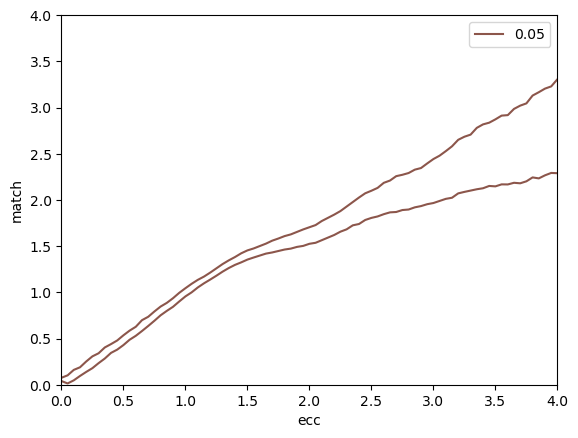

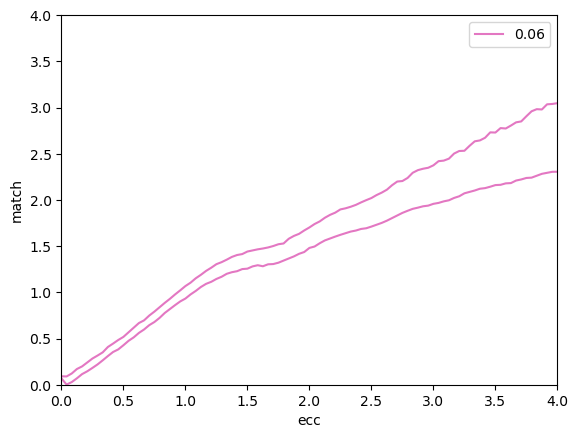

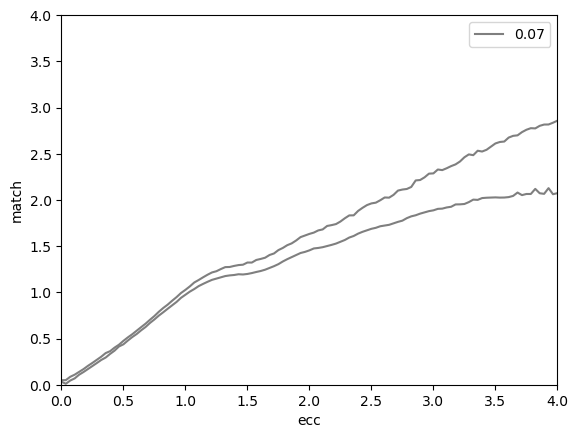

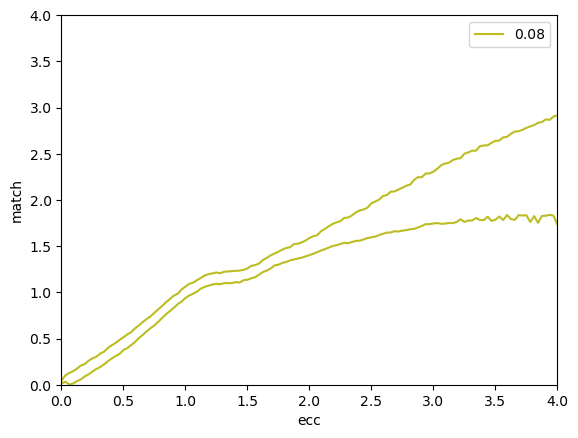

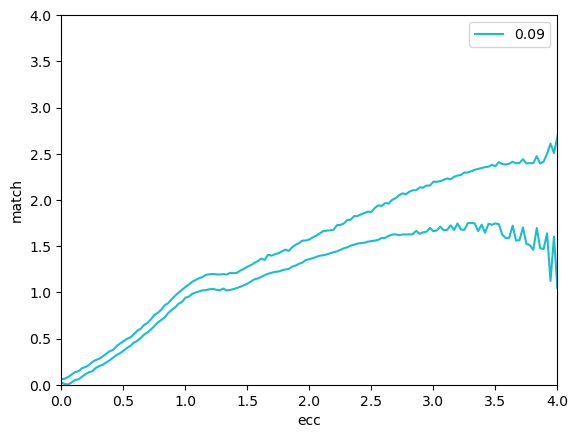

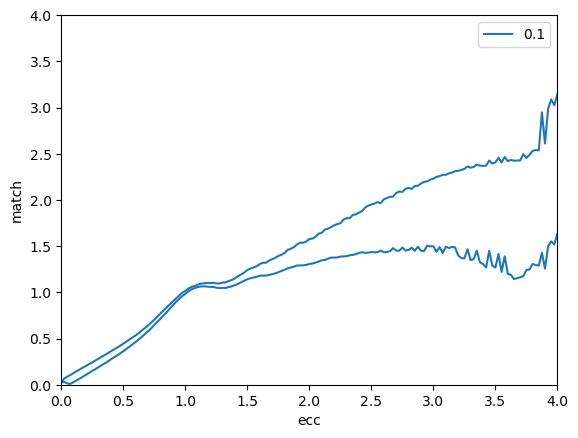

In [13]:
cmap = mpl.colormaps['inferno']
for i, fid_e in enumerate(grid_data_18_fid_es.keys()):
    fid_e_arg = int((fid_e-grid_data_18_fid_es[fid_e]['e_vals'][0])/np.mean(np.diff(grid_data_18_fid_es[fid_e]['e_vals'])))
    fid_e_match_max = grid_data_18_fid_es[fid_e]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_18_fid_es[fid_e]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
    plt.plot(grid_data_18_fid_es[fid_e]['e_vals']/fid_e, grid_data_18_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## 10 chirp mass min/max lines

In [14]:
with open(os.path.join('grid_data', 'dataslot_23', 'all_matches'), 'rb') as fp:
        grid_data_10_fid_es = pickle.load(fp)
grid_data_10_fid_es = find_min_max(grid_data_10_fid_es, extra_keys=[])

/tmp/ipykernel_2120548/3951201521.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/3951201521.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
/tmp/ipykernel_2120548/3951201521.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
/tmp/ipykernel_2120548/3951201521.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')


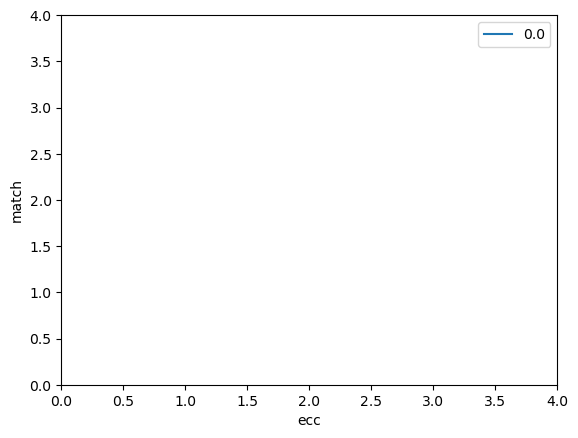

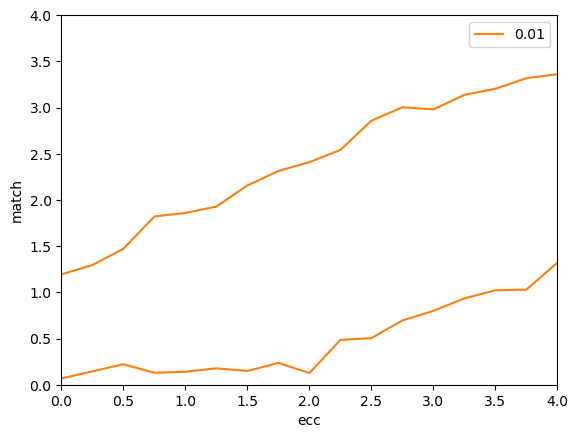

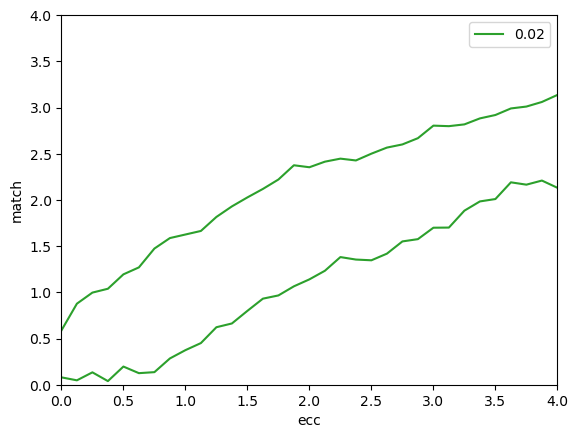

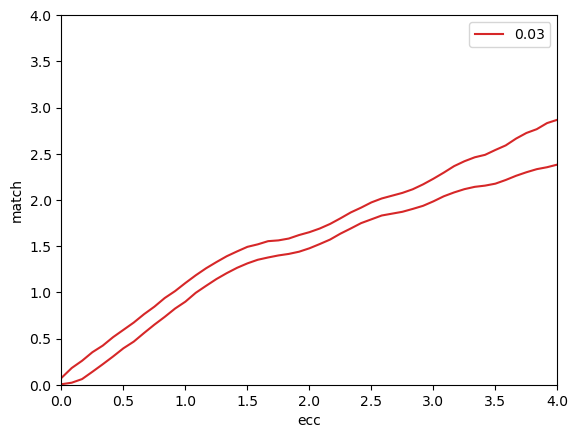

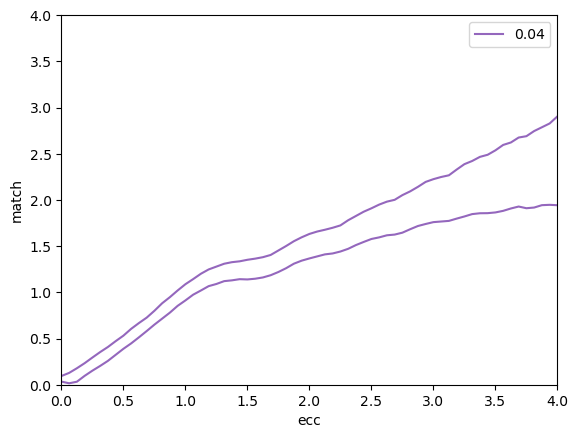

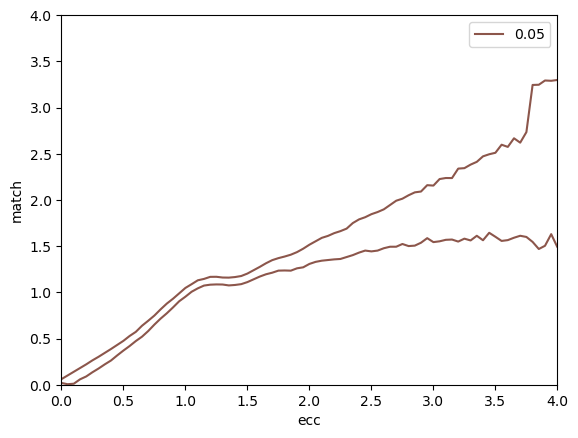

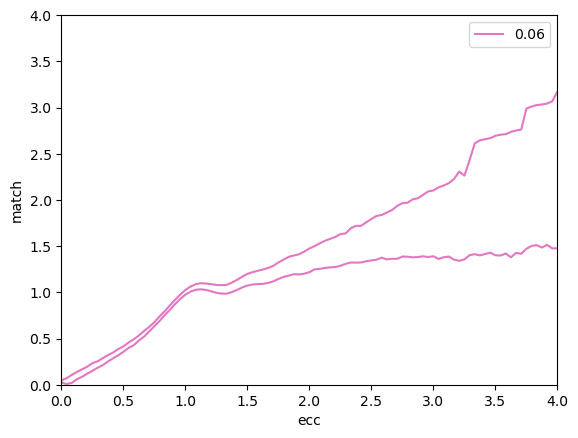

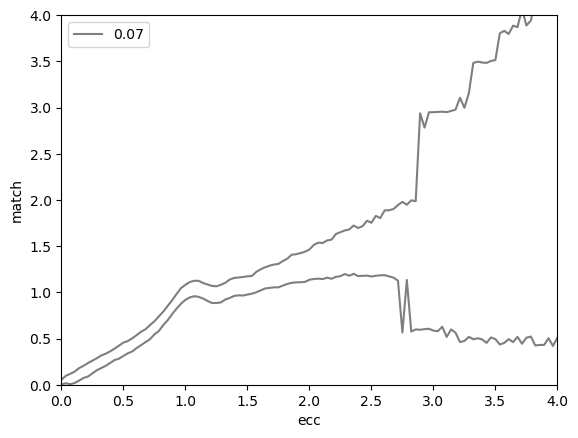

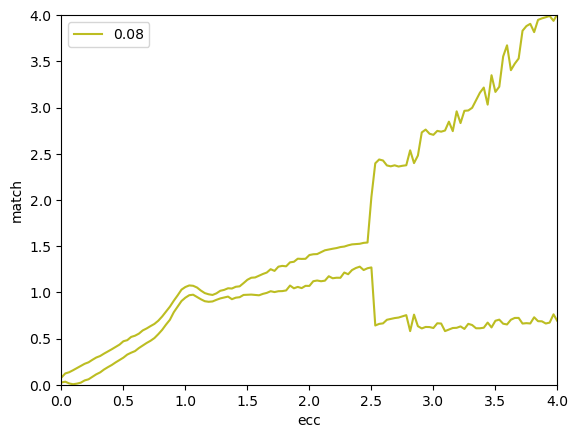

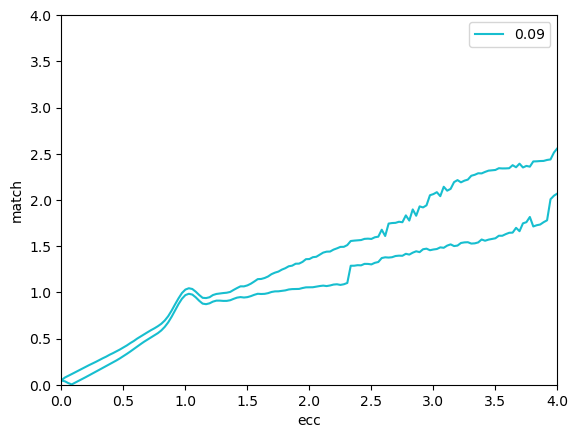

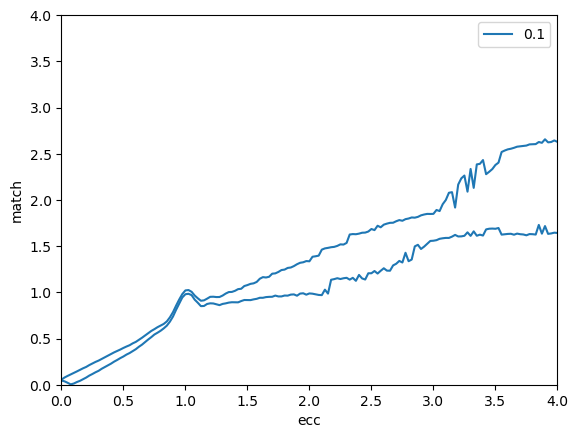

In [15]:
cmap = mpl.colormaps['inferno']
for i, fid_e in enumerate(grid_data_10_fid_es.keys()):
    fid_e_arg = int((fid_e-grid_data_10_fid_es[fid_e]['e_vals'][0])/np.mean(np.diff(grid_data_10_fid_es[fid_e]['e_vals'])))
    fid_e_match_max = grid_data_10_fid_es[fid_e]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_10_fid_es[fid_e]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=str(fid_e))
    plt.plot(grid_data_10_fid_es[fid_e]['e_vals']/fid_e, grid_data_10_fid_es[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## 

It is clear here that lower chirp masses do indeed require lower fiducial eccentricities. Also true however is that lower chirp masses are unable to go to as high eccentricities before the min/max lines start to 'turn over' or just become weird. This makes sense, as lower chirp masses have more of the signal in band so the assumption that only the amplitude of harmonics changes as you change eccentricity is less valid.

Turning to which fiducial eccentricity works best for each chirp mass, very roughly I would say the following:
- 30: 0.09
- 18: 0.03
- 10: 0.03

This is very rough however with the 'niceness' of the min/max lines changing often fairly significantly between fiducial eccentricity values.

## Trying to find fiducial eccentricity scaling analytically

By looking at match equations used to derive the degeneracy line we may be able to analytically find the best fiducial eccentricity for each chirp mass (or at least the scaling which we can then normalise).

We start from the following equation for the square of the match:

$$
1 - a^2 \hat{\mathcal{M}}^{-10/3} \left[ \delta m^2 \left(\overline{f^{-10/3}} - \overline{f^{-5/3}}^2 \right) + 2 \delta m \left(\overline{kf^{-10/3}} - \overline{f^{-5/3}} \; \overline{kf^{-5/3}}\right) + \left( \overline{k^2f^{-10/3}} - \overline{kf^{-5/3}}^2\right)\right].
$$

As a reminder, $a$ is just constants, $\mathcal{M}$ is the chirp mass at zero eccentricity, $k$ is a function of eccentricity, and $\delta m$ is a parameter describing the change in chirp mass along the line, which we have solved to equal the following along the degeneracy line:

$$
\delta m = - \frac{\left(\overline{kf^{-10/3}} - \overline{f^{-5/3}} \; \overline{kf^{-5/3}}\right)}{\left(\overline{f^{-10/3}} - \overline{f^{-5/3}}^2 \right)}.
$$

We can then substitute this in to recover (and recognise we only need to keep the mismatch component constant, so will drop the preceding $1-$ for simplicity):

$$
a^2 \hat{\mathcal{M}}^{-10/3} \left[ - \left(\overline{kf^{-10/3}} - \overline{f^{-5/3}} \; \overline{kf^{-5/3}}\right)^2/\left(\overline{f^{-10/3}} - \overline{f^{-5/3}}^2 \right) + \left( \overline{k^2f^{-10/3}} - \overline{kf^{-5/3}}^2\right)\right].
$$

We can now see that the scaling is approximately $\hat{\mathcal{M}}^{-10/3} e^4$ using $k \sim e^2$. We should therefore use a scaling of $e \sim \hat{\mathcal{M}}^{5/6}$

Normalising the scaling by assuming that the best fiducial eccentricity for a chirp mass of 30 is equal to 0.09, this gives the following datapoints:
- 30: 0.09
- 18: 0.059
- 10: 0.036

This can definitely be argued to be consistent with the min/max lines plotted above.

## Fine 30 chirp mass min/max lines

In [16]:
with open(os.path.join('grid_data', 'dataslot_25', 'all_matches'), 'rb') as fp:
        grid_data_30_fid_es_fine = pickle.load(fp)
grid_data_30_fid_es_fine = find_min_max(grid_data_30_fid_es_fine, extra_keys=[])

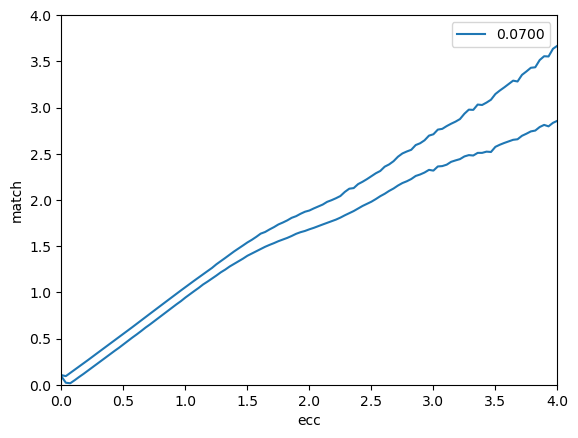

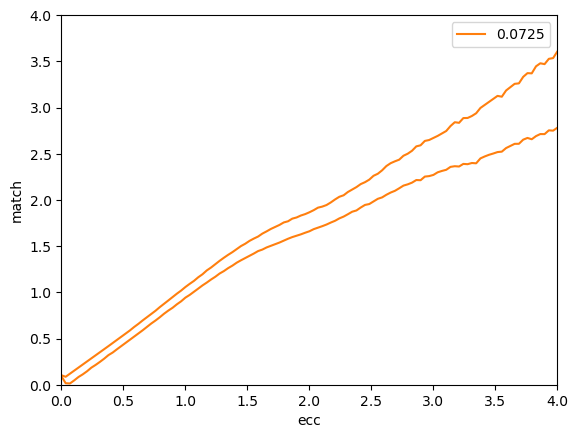

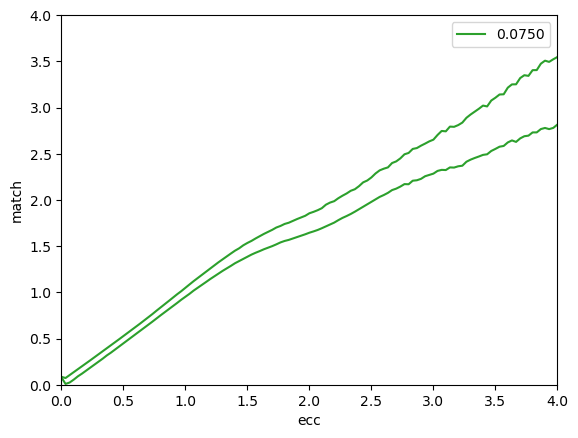

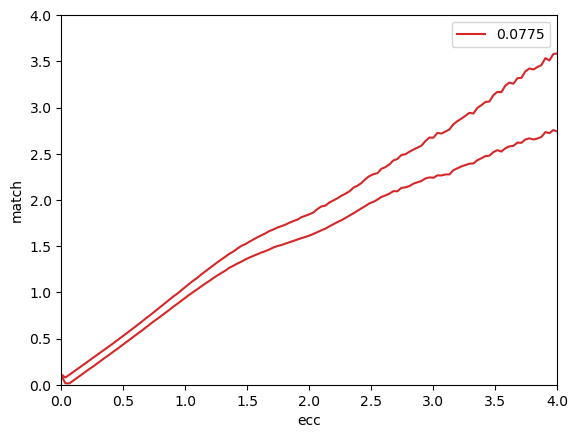

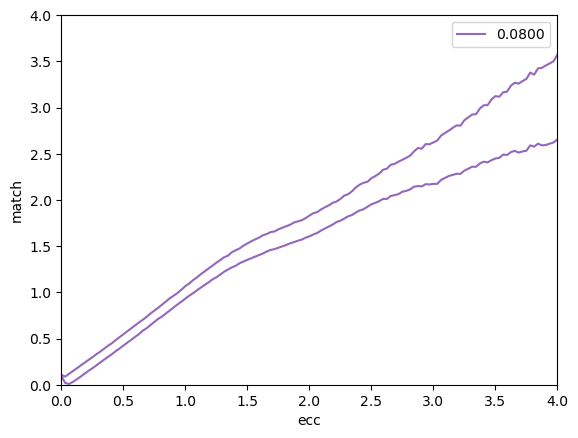

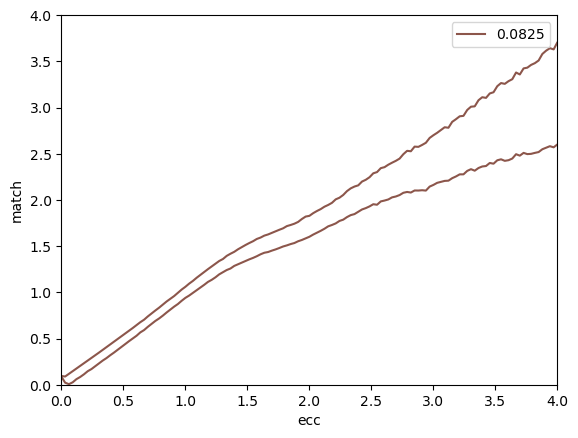

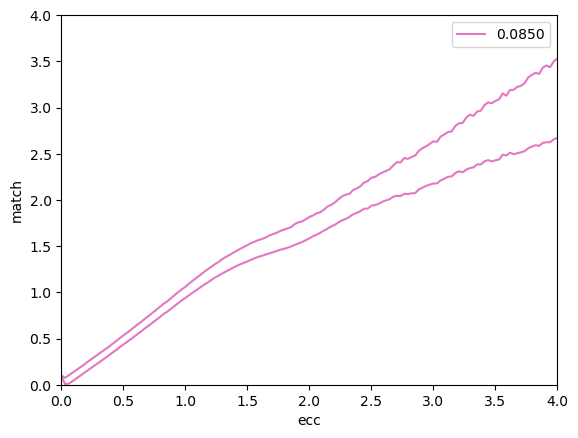

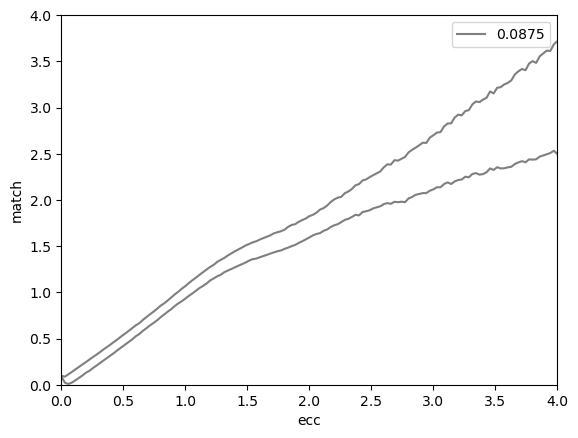

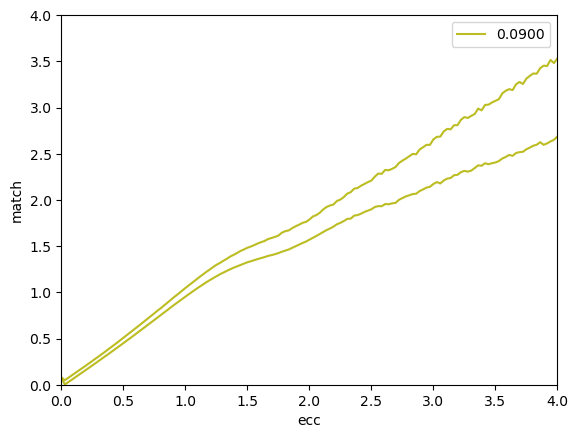

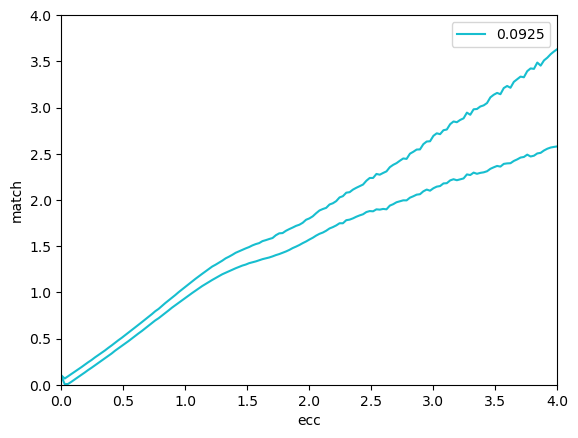

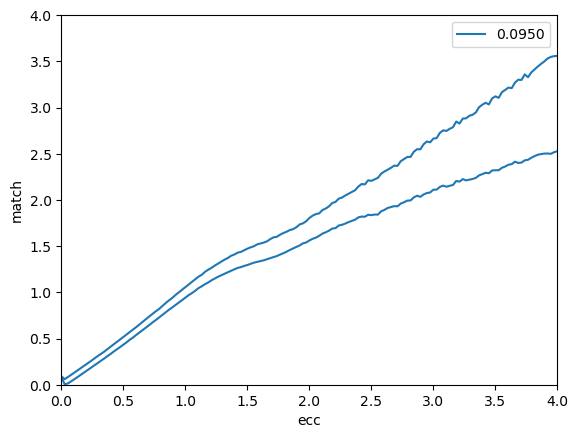

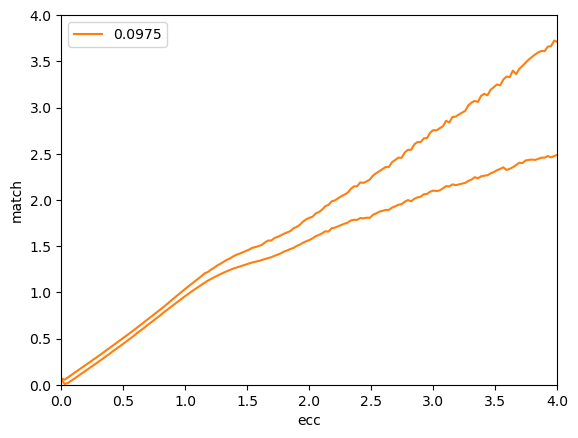

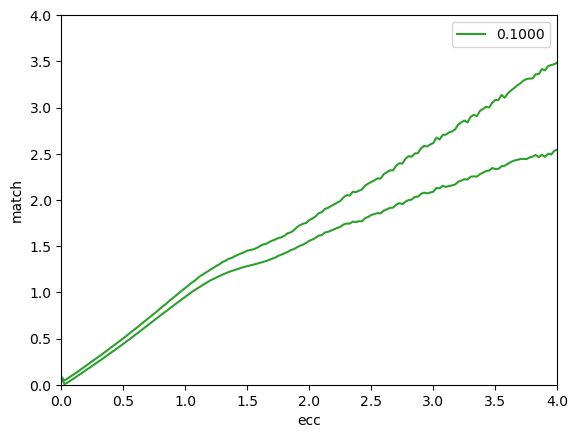

In [17]:
cmap = mpl.colormaps['inferno']
for i, fid_e in enumerate(grid_data_30_fid_es_fine.keys()):
    fid_e_arg = int((fid_e-grid_data_30_fid_es_fine[fid_e]['e_vals'][0])/np.mean(np.diff(grid_data_30_fid_es_fine[fid_e]['e_vals'])))
    fid_e_match_max = grid_data_30_fid_es_fine[fid_e]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_30_fid_es_fine[fid_e]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_30_fid_es_fine[fid_e]['e_vals']/fid_e, grid_data_30_fid_es_fine[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=f'{fid_e:.4f}')
    plt.plot(grid_data_30_fid_es_fine[fid_e]['e_vals']/fid_e, grid_data_30_fid_es_fine[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## Fine 10 chirp mass min/max lines

In [18]:
with open(os.path.join('grid_data', 'dataslot_26', 'all_matches'), 'rb') as fp:
        grid_data_10_fid_es_fine = pickle.load(fp)
grid_data_10_fid_es_fine = find_min_max(grid_data_10_fid_es_fine, extra_keys=[])

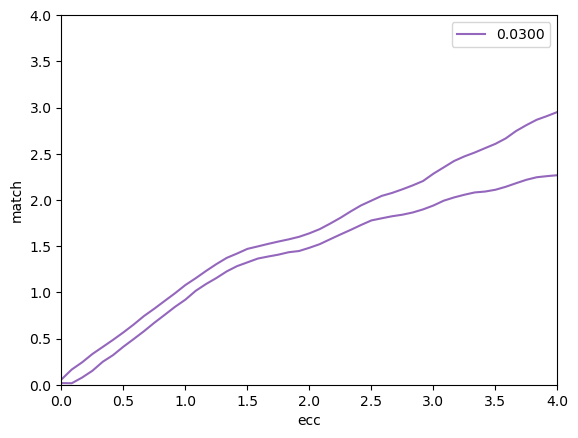

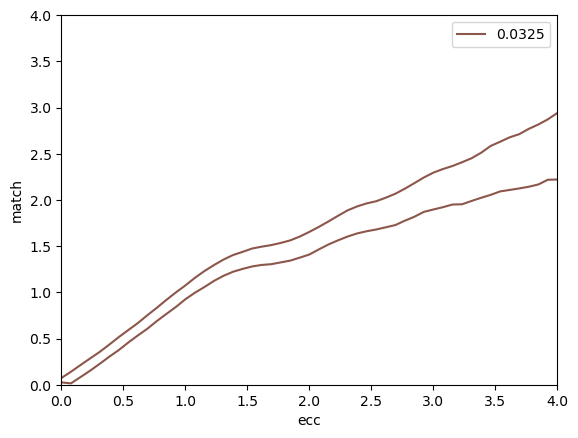

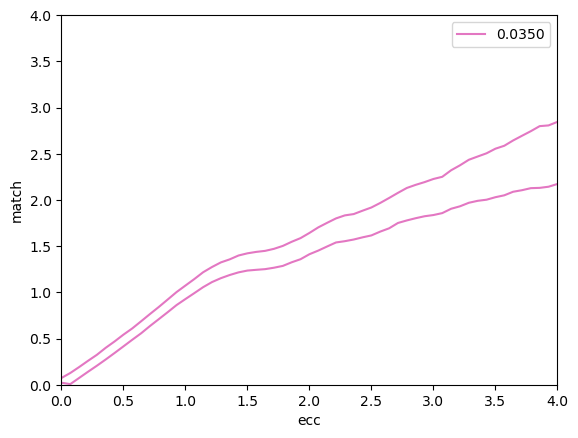

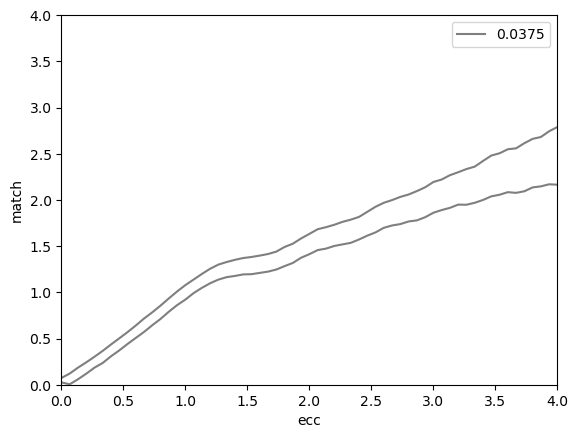

In [19]:
cmap = mpl.colormaps['inferno']
for i, fid_e in enumerate(grid_data_10_fid_es_fine.keys()):
    if i <4 or i==8:
        continue
    fid_e_arg = int((fid_e-grid_data_10_fid_es_fine[fid_e]['e_vals'][0])/np.mean(np.diff(grid_data_10_fid_es_fine[fid_e]['e_vals'])))
    fid_e_match_max = grid_data_10_fid_es_fine[fid_e]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_10_fid_es_fine[fid_e]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_10_fid_es_fine[fid_e]['e_vals']/fid_e, grid_data_10_fid_es_fine[fid_e]['h1_h0_max']/y_norm, c=f'C{i}', label=f'{fid_e:.4f}')
    plt.plot(grid_data_10_fid_es_fine[fid_e]['e_vals']/fid_e, grid_data_10_fid_es_fine[fid_e]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## 

Choosing a fiducial eccentricity of 0.03 for a chirp mass of 10 seems like a good choice based on this. This therefore leads to fiducial eccentricities at the other chirp masses of:
- 30: 0.075
- 18: 0.049
- 10: 0.030

Looking at previously plotted lines, these seem like sensible choices/predictions for the other chirp masses as well, and so will use this as a baseline for the scaling.

## Scaled chirp masses for fiducial eccentricities [10, 0.03]

In [20]:
with open(os.path.join('grid_data', 'dataslot_27', 'all_matches'), 'rb') as fp:
        grid_data_02_15_scaled = pickle.load(fp)
grid_data_02_15_scaled = find_min_max(grid_data_02_15_scaled, extra_keys=[])

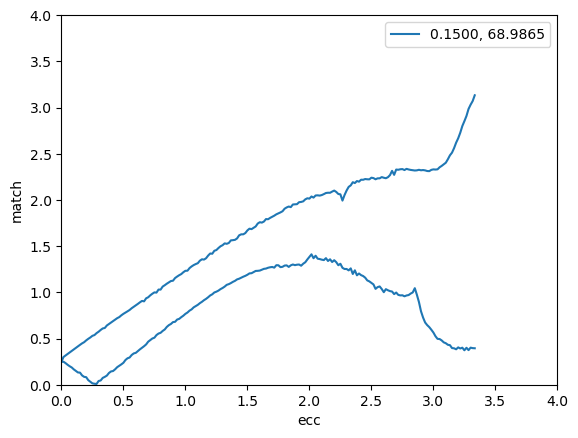

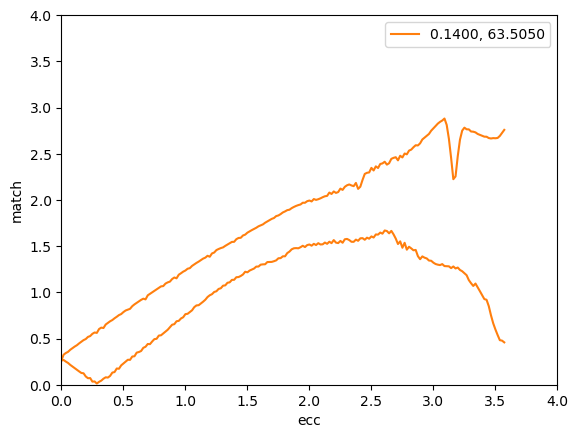

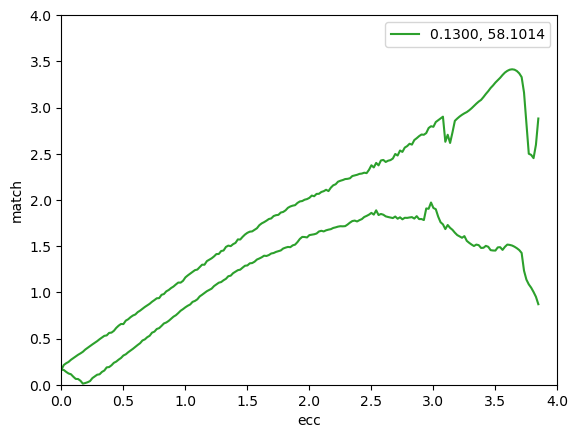

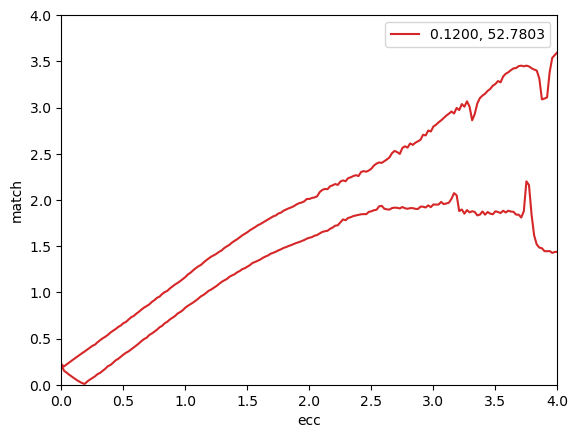

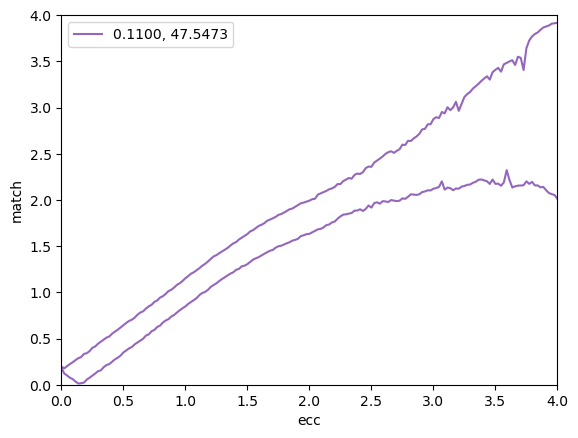

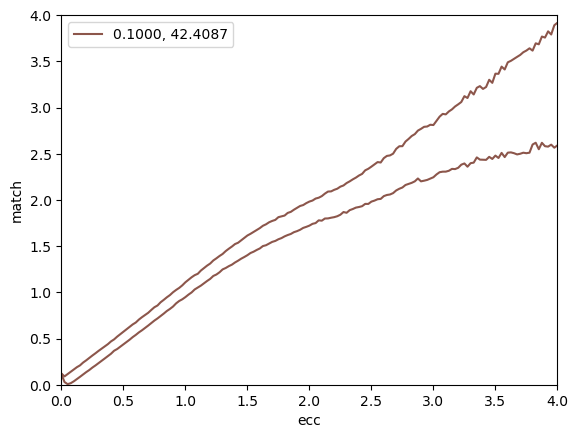

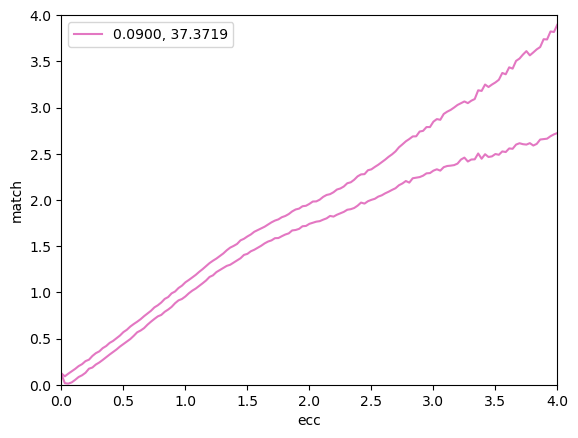

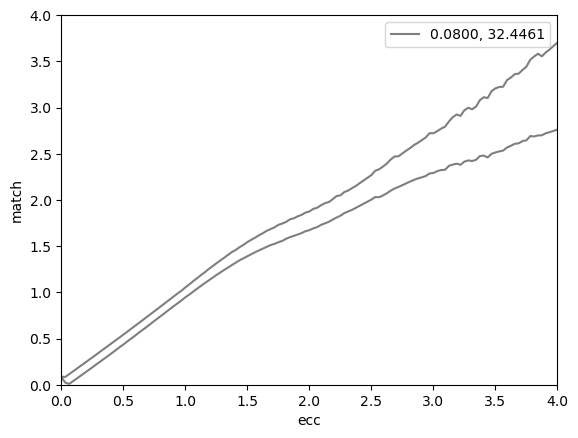

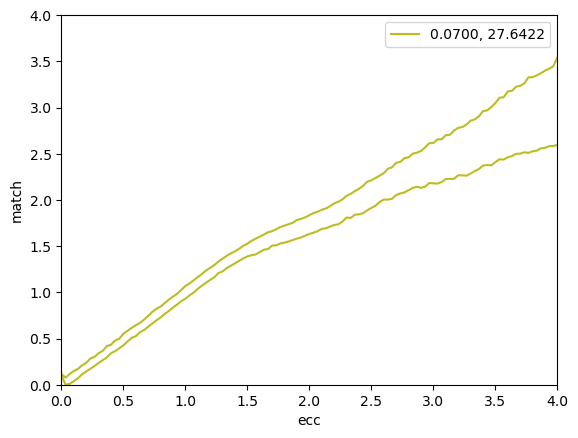

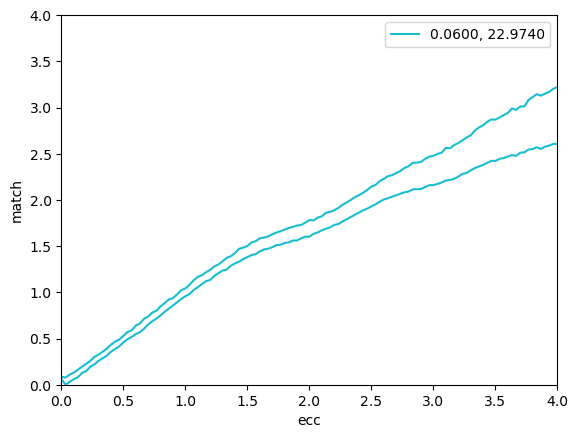

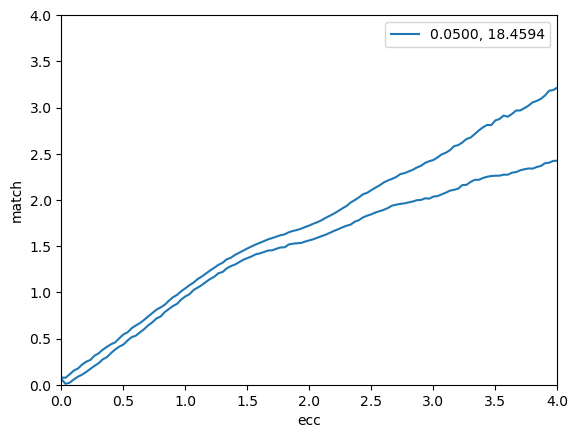

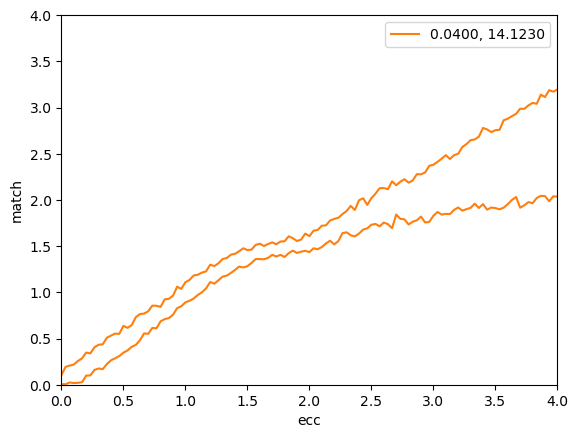

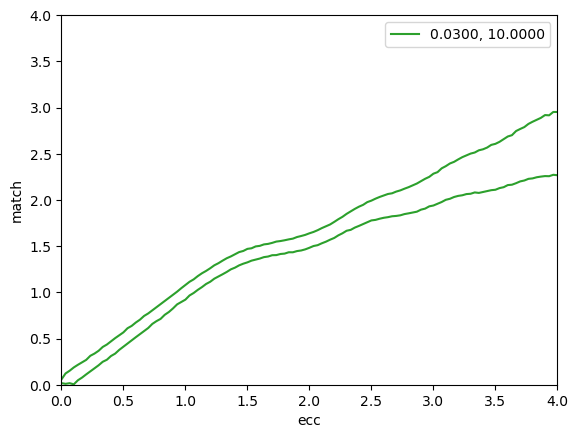

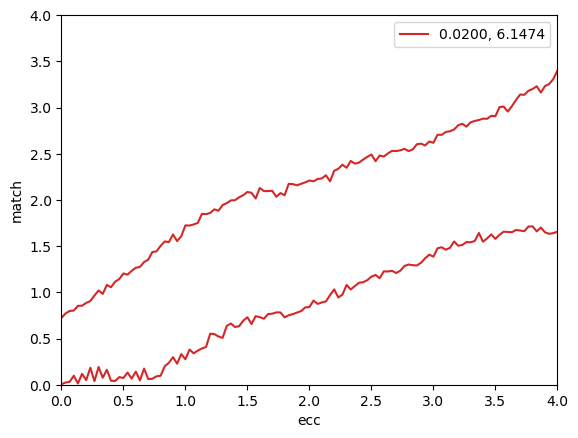

In [21]:
cmap = mpl.colormaps['inferno']
for i, chirp in enumerate(grid_data_02_15_scaled.keys()):
    fid_e = zero_ecc_chirp2fid_e(chirp, scaling_norms=[10, 0.03])
    fid_e_arg = int((fid_e-grid_data_02_15_scaled[chirp]['e_vals'][0])/np.mean(np.diff(grid_data_02_15_scaled[chirp]['e_vals'])))
    fid_e_match_max = grid_data_02_15_scaled[chirp]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_02_15_scaled[chirp]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_02_15_scaled[chirp]['e_vals']/fid_e, grid_data_02_15_scaled[chirp]['h1_h0_max']/y_norm, c=f'C{i}', label=f'{fid_e:.4f}, {chirp:.4f}')
    plt.plot(grid_data_02_15_scaled[chirp]['e_vals']/fid_e, grid_data_02_15_scaled[chirp]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## Scaled chirp masses for fiducial eccentricities [10, 0.0325]

In [22]:
with open(os.path.join('grid_data', 'dataslot_28', 'all_matches'), 'rb') as fp:
        grid_data_02_15_scaled1 = pickle.load(fp)
grid_data_02_15_scaled1 = find_min_max(grid_data_02_15_scaled1, extra_keys=[])

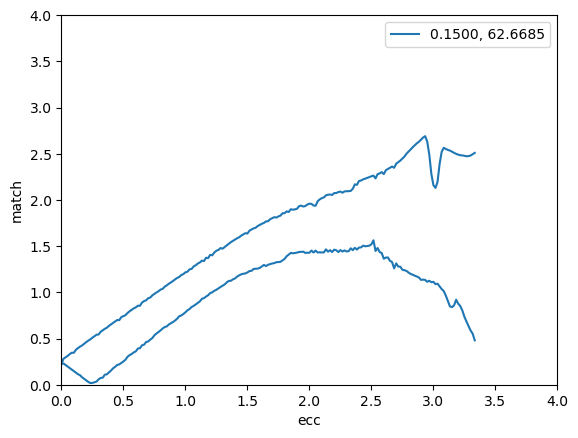

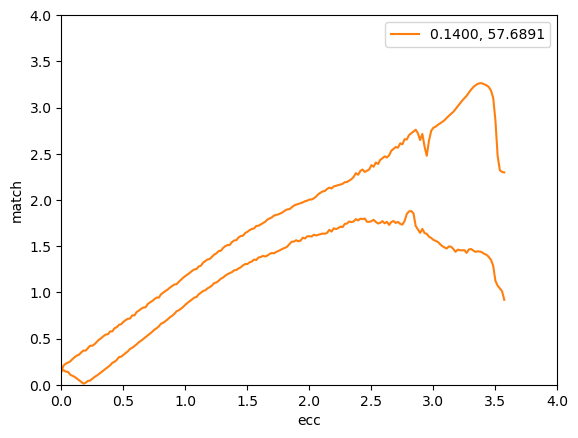

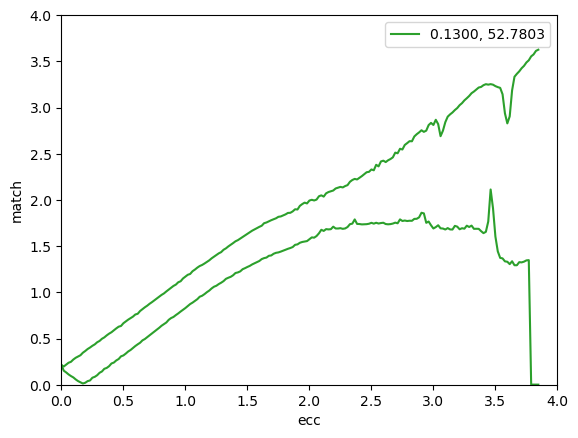

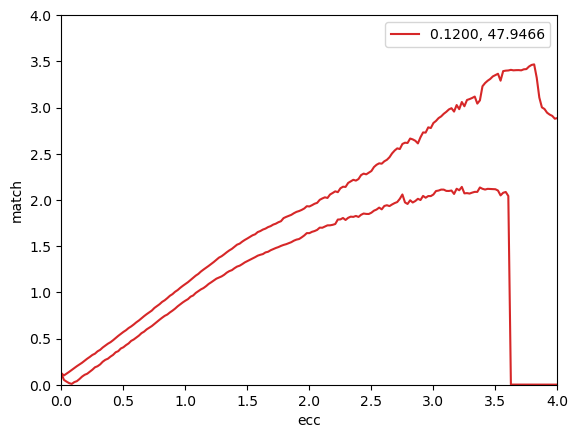

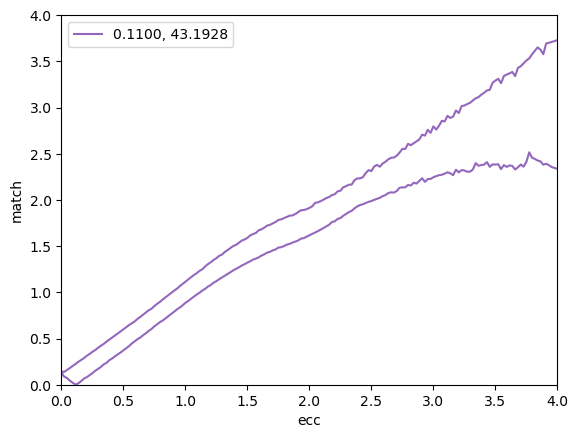

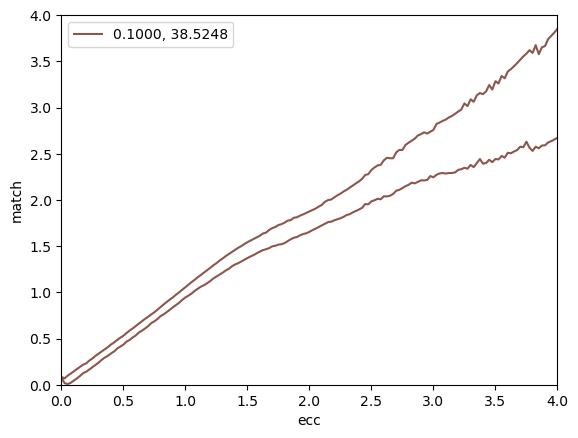

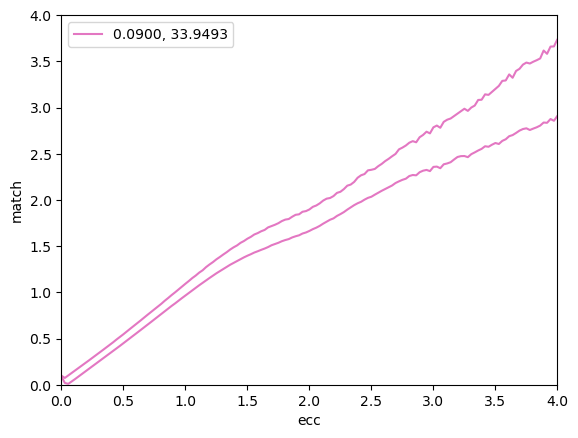

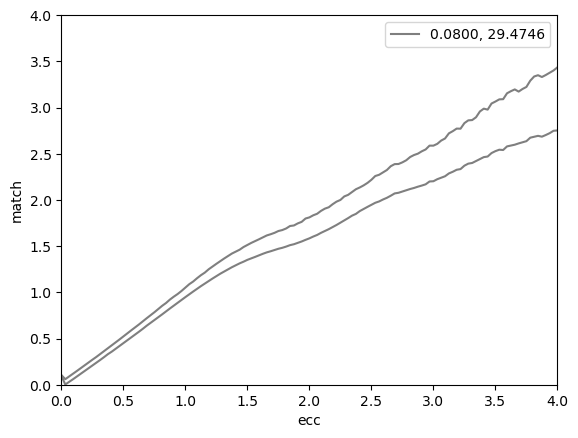

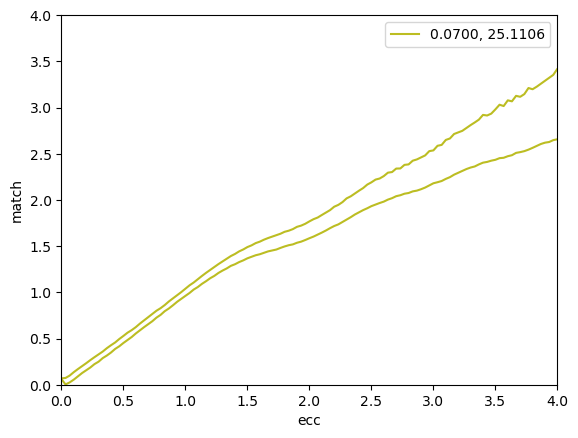

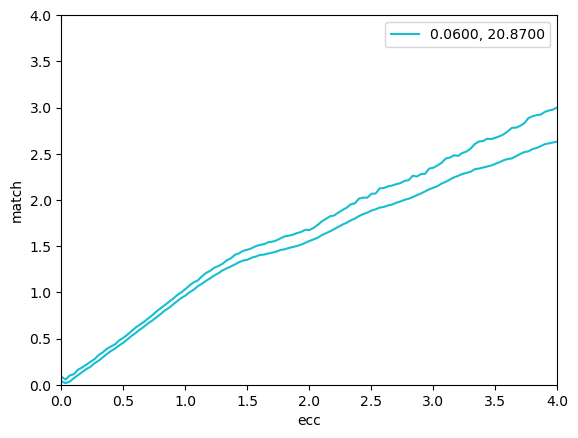

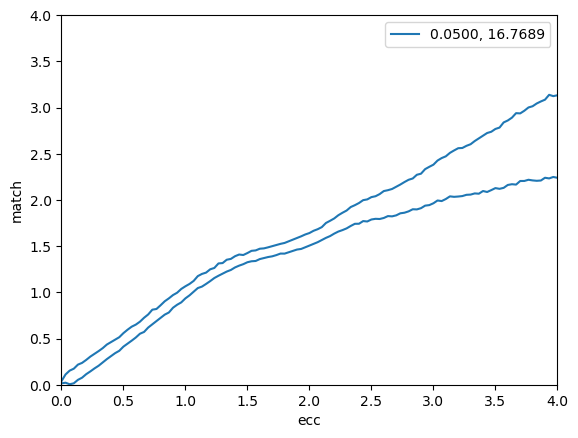

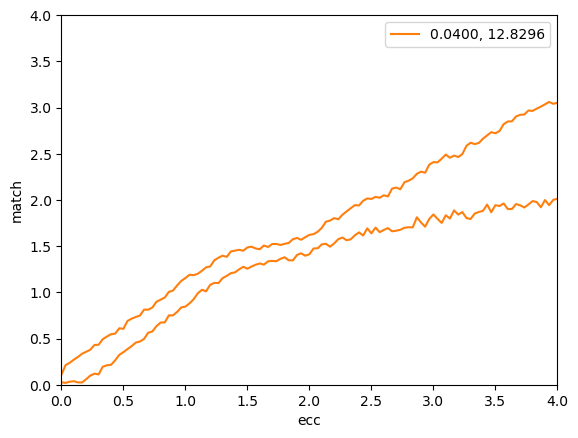

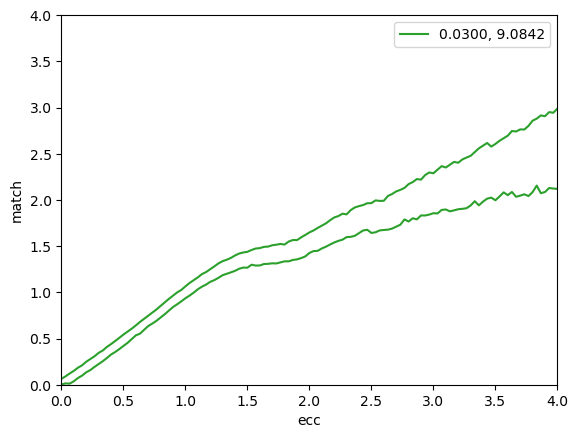

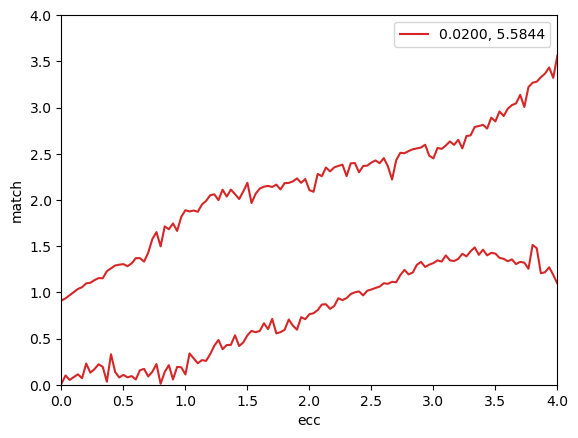

In [23]:
cmap = mpl.colormaps['inferno']
for i, chirp in enumerate(grid_data_02_15_scaled1.keys()):
    fid_e = zero_ecc_chirp2fid_e(chirp, scaling_norms=[10, 0.0325])
    fid_e_arg = int((fid_e-grid_data_02_15_scaled1[chirp]['e_vals'][0])/np.mean(np.diff(grid_data_02_15_scaled1[chirp]['e_vals'])))
    fid_e_match_max = grid_data_02_15_scaled1[chirp]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_02_15_scaled1[chirp]['h1_h0_min'][fid_e_arg]
    y_norm = (fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_02_15_scaled1[chirp]['e_vals']/fid_e, grid_data_02_15_scaled1[chirp]['h1_h0_max']/y_norm, c=f'C{i}', label=f'{fid_e:.4f}, {chirp:.4f}')
    plt.plot(grid_data_02_15_scaled1[chirp]['e_vals']/fid_e, grid_data_02_15_scaled1[chirp]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

## Scaled chirp masses for fiducial eccentricities [10, 0.035]

In [26]:
with open(os.path.join('grid_data', 'dataslot_29', 'all_matches'), 'rb') as fp:
        grid_data_02_15_scaled2 = pickle.load(fp)
grid_data_02_15_scaled2 = find_min_max(grid_data_02_15_scaled2)

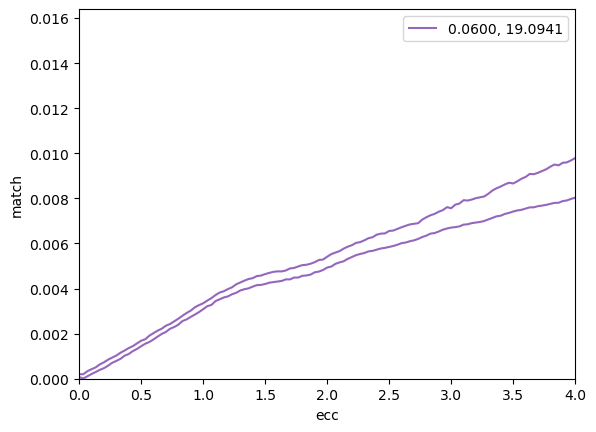

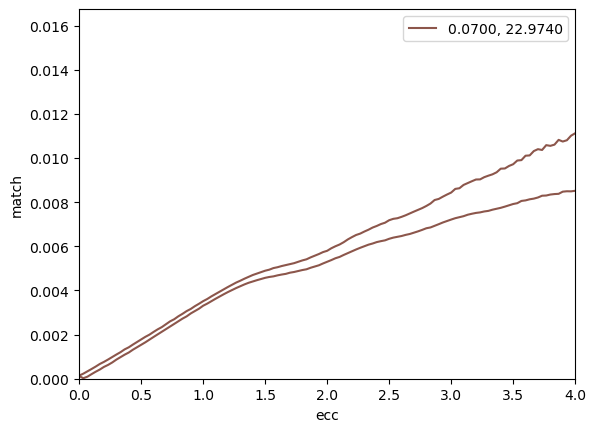

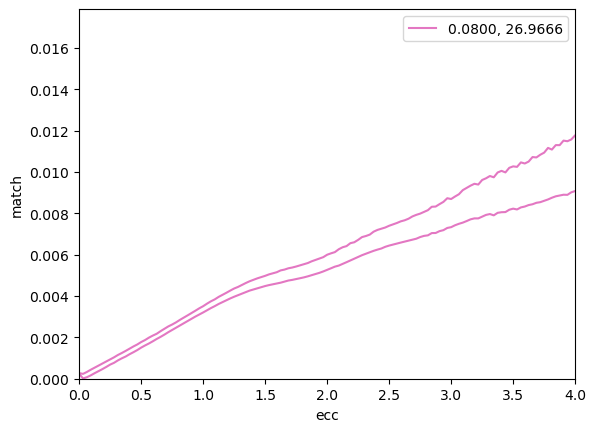

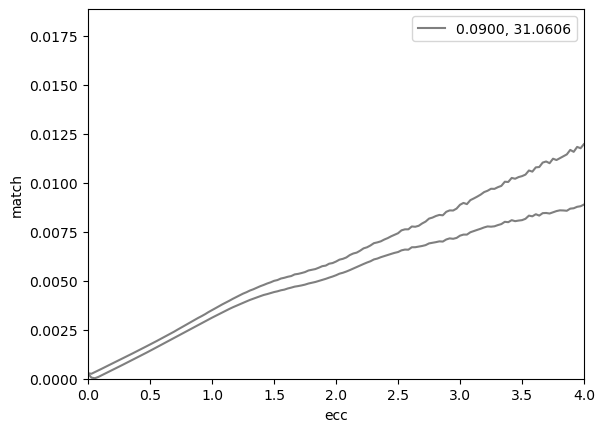

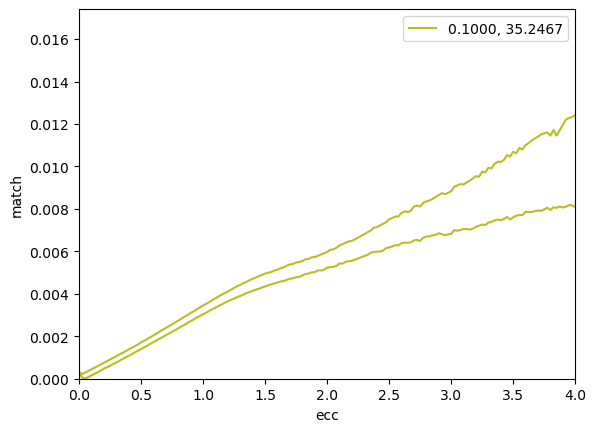

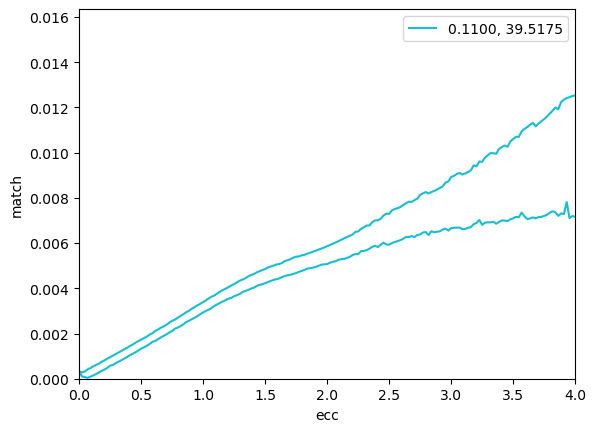

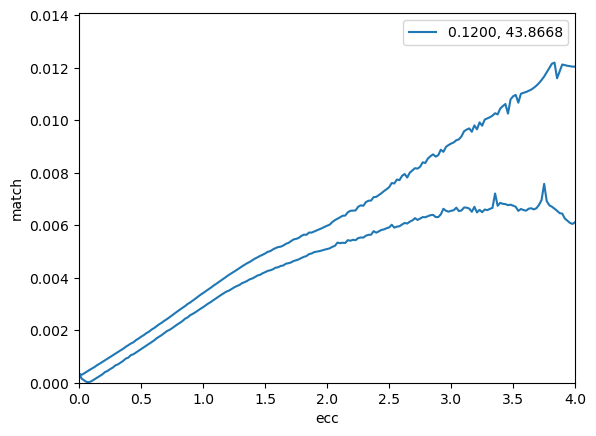

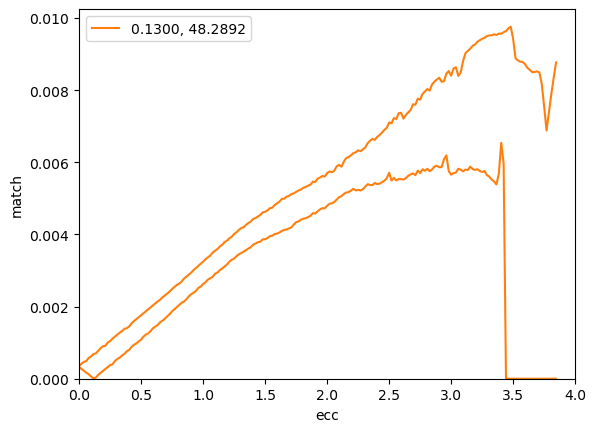

In [27]:
cmap = mpl.colormaps['inferno']
for i, chirp in enumerate(grid_data_02_15_scaled2.keys()):
    if i < 4 or i > 11:
        continue
    fid_e = zero_ecc_chirp2fid_e(chirp, scaling_norms=[10, 0.035])
    fid_e_arg = int((fid_e-grid_data_02_15_scaled2[chirp]['e_vals'][0])/np.mean(np.diff(grid_data_02_15_scaled2[chirp]['e_vals'])))
    fid_e_match_max = grid_data_02_15_scaled2[chirp]['h1_h0_max'][fid_e_arg]
    fid_e_match_min = grid_data_02_15_scaled2[chirp]['h1_h0_min'][fid_e_arg]
    y_norm = chirp#(fid_e_match_max+fid_e_match_min)/2
    plt.plot(grid_data_02_15_scaled2[chirp]['e_vals']/fid_e, grid_data_02_15_scaled2[chirp]['h1_h0_max']/y_norm, c=f'C{i}', label=f'{fid_e:.4f}, {chirp:.4f}')
    plt.plot(grid_data_02_15_scaled2[chirp]['e_vals']/fid_e, grid_data_02_15_scaled2[chirp]['h1_h0_min']/y_norm, c=f'C{i}')
    plt.legend()
    plt.ylabel('match')
    plt.xlabel('ecc')
    plt.xlim(0,4)
    plt.ylim(0)
    plt.show()

## Interpolating between scaled chirp masses

In [28]:
with open(os.path.join('grid_data', 'dataslot_29', 'all_matches'), 'rb') as fp:
        grid_data_02_15_scaled2 = pickle.load(fp)
grid_data_02_15_scaled2 = find_min_max(grid_data_02_15_scaled2)
grid_data_02_15_interps2 = scaled_2D_interps(grid_data_02_15_scaled2, 'h1_h0')

In [29]:
grid_data_02_15_scaled2.keys()

dict_keys([5.109216918045607, 8.311202280819249, 11.737898138164017, 15.342013196939702, 19.09412877604935, 22.973967099940698, 26.96660856486353, 31.060565479858784, 35.24669064333487, 39.51750973664827, 43.86678863029888, 48.28923991500753, 52.780316430915754, 57.33606154625207])

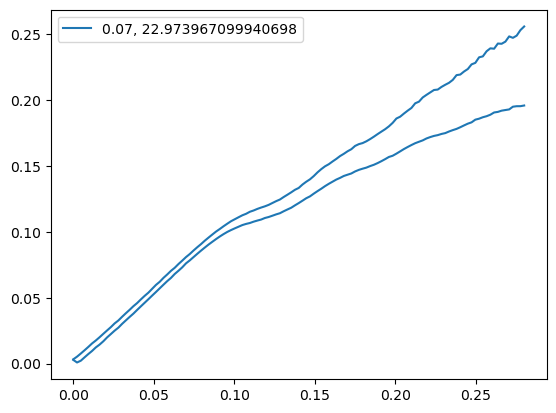

In [32]:
chirp = 22.973967099940698
fid_e = zero_ecc_chirp2fid_e(chirp)
e_vals = grid_data_02_15_scaled2[chirp]['e_vals']
e_vals = e_vals[e_vals<=fid_e*4]
max_line = grid_data_02_15_interps2[0](fid_e, e_vals/fid_e)*chirp
min_line = grid_data_02_15_interps2[1](fid_e, e_vals/fid_e)*chirp
plt.plot(e_vals, max_line, c=f'C{0}', label=f'{fid_e}, {chirp}')
plt.plot(e_vals, min_line, c=f'C{0}')
plt.legend()
plt.show()

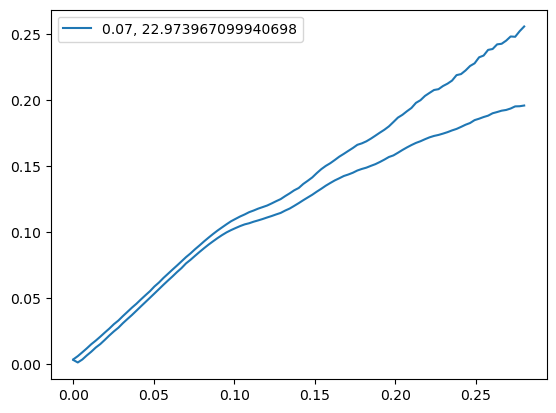

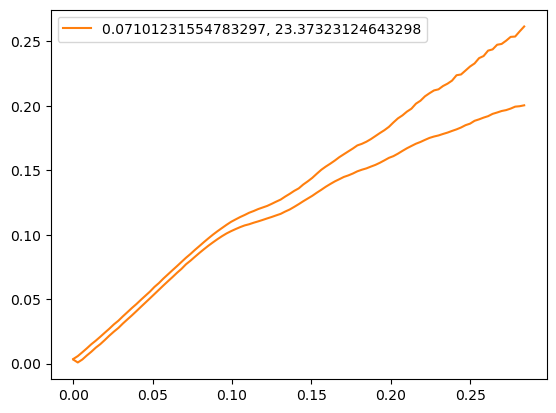

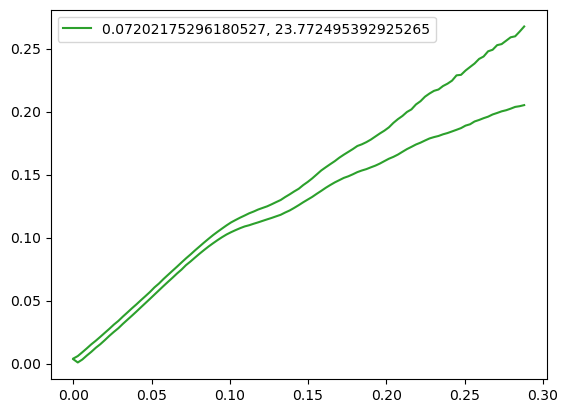

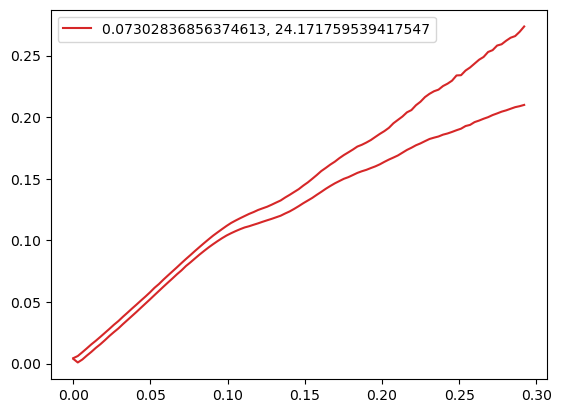

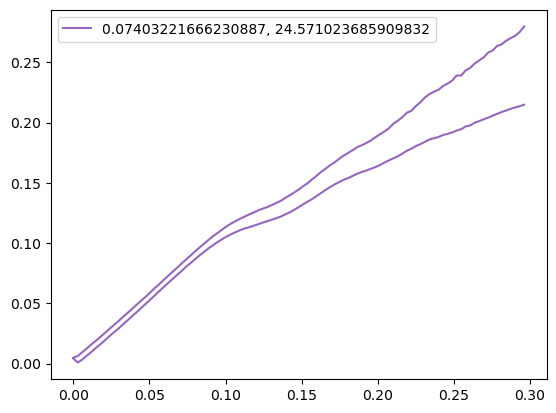

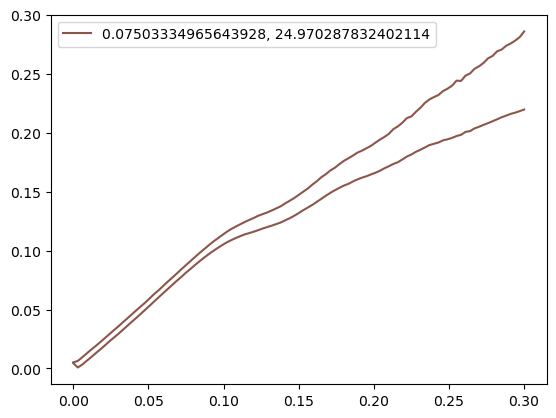

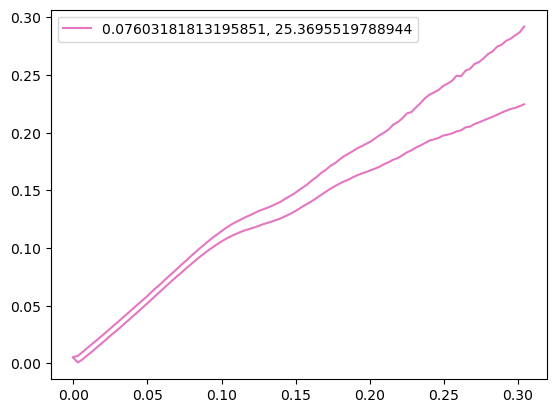

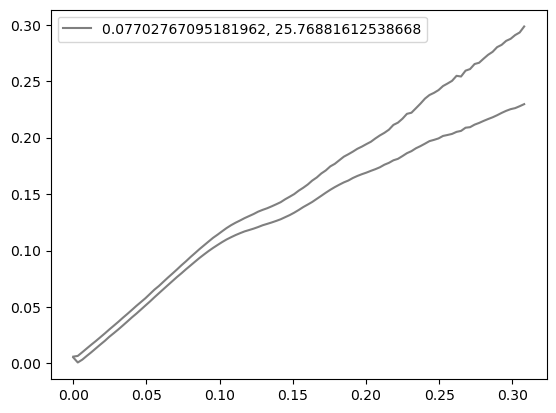

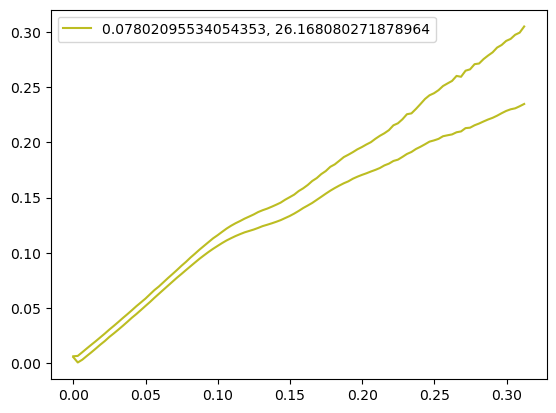

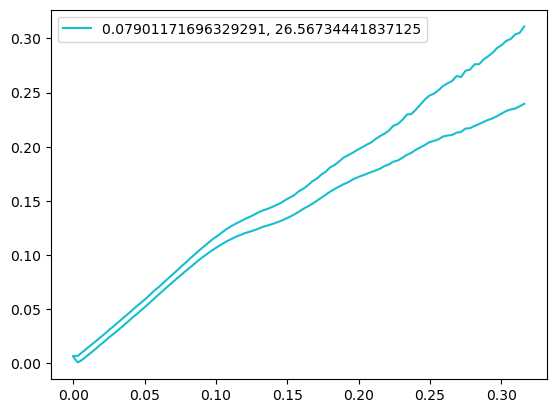

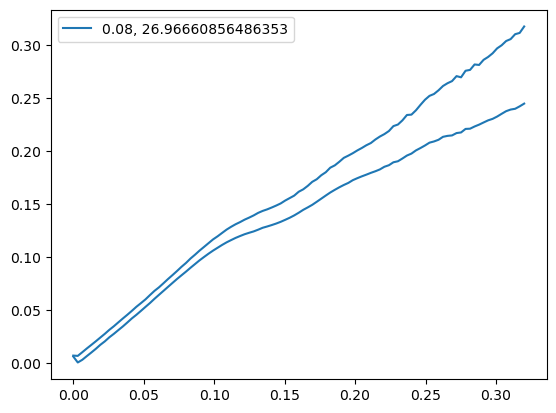

In [34]:
chirps = np.linspace(22.973967099940698, 26.96660856486353, 11)
for i, chirp in enumerate(chirps):
    fid_e = zero_ecc_chirp2fid_e(chirp)
    e_vals = np.linspace(0, fid_e*4, 101)
    max_line = grid_data_02_15_interps2[0](fid_e, e_vals/fid_e)*chirp
    min_line = grid_data_02_15_interps2[1](fid_e, e_vals/fid_e)*chirp
    plt.plot(e_vals, max_line, c=f'C{i}', label=f'{fid_e}, {chirp}')
    plt.plot(e_vals, min_line, c=f'C{i}')
    plt.legend()
    plt.show()

# Revisiting after raising low_frequency_cutoff to 20 Hz

Since we raised low_frequency_cutoff to 20 Hz, min max lines look overall improved however show some effects that suggest the (normalisation of the) fid_e scaling may no longer be appropriate, so will re-investigate it here to see if there is now a better choice. The visible effects suggest that the normalisation may now be using eccentricities too high, and so we will run jobs for 10, 24, and 50 chirp masses with a range of fiducial eccentricities, mainly focused on current value and below. (Chirp masses quoted here are the zero eccentricity chirp masses of the degeneracy lines).

In [7]:
np.linspace(0.065, 0.14, 11)

array([0.065 , 0.0725, 0.08  , 0.0875, 0.095 , 0.1025, 0.11  , 0.1175,
       0.125 , 0.1325, 0.14  ])